# Modif CSV

In [22]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(r"C:\Users\krish\ai-power-converter\machine-learning\simulation_results_adjusted_1000.csv")

# Specify the columns you want to remove
columns_to_remove = ["No"]  # Specify the columns you want to remove

# Drop the specified columns
df_truncated = df.drop(columns=columns_to_remove)

# Save the truncated DataFrame back to a CSV file
df_truncated.to_csv("modified_dataset.csv", index=False)


# Scalarization

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
df = pd.read_csv(r"C:\Users\krish\ai-power-converter\machine-learning\modified_dataset.csv")

# Select only the input features (L, C, fsw)
input_features = df[["L", "C", "fsw"]]

# Apply scalarization to input features
scaler = MinMaxScaler()
input_scaled = scaler.fit_transform(input_features)

# Create a DataFrame with the scaled input features
df_input_scaled = pd.DataFrame(input_scaled, columns=["L_scaled", "C_scaled", "fsw_scaled"])

# Concatenate the scaled input features with the remaining columns
df_processed = pd.concat([df_input_scaled, df.drop(columns=["L", "C", "fsw"])], axis=1)

# Save the DataFrame with scaled input features to a new CSV file
df_processed.to_csv("processed_dataset.csv", index=False)


# Machine Learning

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"C:\Users\krish\ai-power-converter\machine-learning\modified_dataset.csv")

# Select input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Scale input features to range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Output features
y = df[["delta_current_percentage", "delta_voltage_percentage", "switching_loss", "capacitor_loss", "inductor_copper_loss"]].values

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(3,)),  # Scalarization layer
    tf.keras.layers.Dense(64, activation='relu'),          # Hidden layer 1
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(64, activation='relu'),          # Hidden layer 2
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(64, activation='relu'),          # Hidden layer 3
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(5)                               # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Optionally, save the model
model.save("power_converter_model.h5")


KeyboardInterrupt: 

In [20]:
# Length of training data
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))

# Length of validation data
print("Length of X_val:", len(X_val))
print("Length of y_val:", len(y_val))

# Length of testing data
print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))

Length of X_train: 700
Length of y_train: 700
Length of X_val: 150
Length of y_val: 150
Length of X_test: 150
Length of y_test: 150


In [ ]:
# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)

# Alternatively, you can make predictions and then compute metrics
y_pred = model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = tf.keras.losses.mean_squared_error(y_test, y_pred).numpy()

# Compute Mean Absolute Error (MAE)
mae = tf.keras.losses.mean_absolute_error(y_test, y_pred).numpy()

# Compute R-squared (R2) score
r2 = 1 - (mse / np.var(y_test))

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Epoch 1/50
22/22 [==============================] - 2s 16ms/step - loss: 6.6250 - val_loss: 6.8709
Epoch 2/50
22/22 [==============================] - 0s 6ms/step - loss: 5.5232 - val_loss: 6.3224
Epoch 3/50
22/22 [==============================] - 0s 6ms/step - loss: 4.9424 - val_loss: 5.8474
Epoch 4/50
22/22 [==============================] - 0s 6ms/step - loss: 4.4346 - val_loss: 5.3929
Epoch 5/50
22/22 [==============================] - 0s 6ms/step - loss: 3.9448 - val_loss: 4.8866
Epoch 6/50
22/22 [==============================] - 0s 6ms/step - loss: 3.4752 - val_loss: 4.3634
Epoch 7/50
22/22 [==============================] - 0s 6ms/step - loss: 2.9426 - val_loss: 3.7736
Epoch 8/50
22/22 [==============================] - 0s 6ms/step - loss: 2.4282 - val_loss: 3.2910
Epoch 9/50
22/22 [==============================] - 0s 6ms/step - loss: 1.9158 - val_loss: 2.8363
Epoch 10/50
22/22 [==============================] - 0s 6ms/step - loss: 1.5179 - val_loss: 2.4626
Epoch 11/50
22/22 

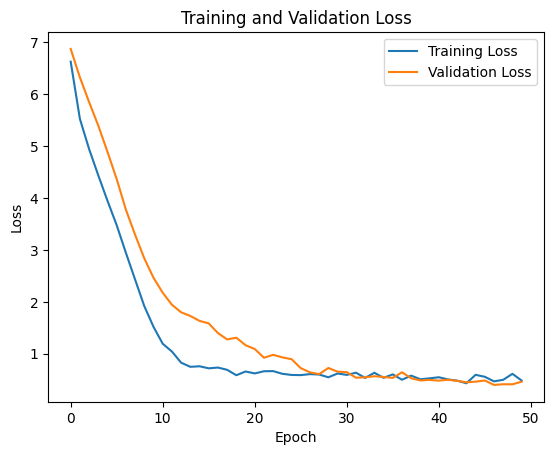

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"C:\Users\krish\ai-power-converter\machine-learning\simulation_results_adjusted_1000.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl _L_Cu"]].values  # Adjust column names as per your dataset

# Scale input features to range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")

# Define the neural network model
# model = tf.keras.Sequential([
#     tf.keras.layers.BatchNormalization(input_shape=(3,)),  # Scalarization layer
#     tf.keras.layers.Dense(64, activation='relu'),          # Hidden layer 1
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(64, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(64, activation='relu'),          # Hidden layer 3
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(6)                               # Output layer with 3 neurons
# ])

model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(3,)),  # Scalarization layer
    tf.keras.layers.Dense(32, activation='relu'),          # Hidden layer 1
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(32, activation='relu'),          # Hidden layer 2
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(6)                               # Output layer with 6 neurons
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with custom callback to print information at the end of each epoch
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[PrintEpochInfo()], verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# Optionally, save the model
model.save("ripples_prediction_model.h5")


5/5 [==============================] - 0s 3ms/step - loss: 0.3859
Mean Squared Error on Testing Set: 0.38587820529937744


c:\Users\krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# Use the trained model to make predictions on the testing set
predictions = model.predict(X_test)

# Print the first few predictions
print("Predictions:")
print(predictions[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

5/5 [==============================] - 0s 4ms/step
Predictions:
[[ 2.56783783e-01  1.91696167e+00  3.07244086e+00  2.97385216e+00
   1.29384726e-01  1.82352483e+00]
 [ 2.98585147e-01  7.87321234e+00  3.16444373e+00  3.14428473e+00
   3.77470255e-03  2.21742558e+00]
 [ 1.42786205e-02  6.05143785e+00  3.16612005e+00  3.19480038e+00
   8.03098083e-03  2.40301943e+00]
 [-1.49701506e-01  1.97604406e+00  2.78158092e+00  2.84697104e+00
   6.22998774e-02  9.38777804e-01]
 [ 1.76816136e-01  4.67547512e+00  2.68772626e+00  2.79932094e+00
   8.18899274e-03  1.74118304e+00]
 [ 1.42944649e-01  1.51573563e+00  2.39025950e+00  2.30828714e+00
  -3.57681215e-02  1.73327351e+00]
 [ 1.18832015e-01  8.28504086e-01  1.99017704e+00  2.16389894e+00
  -5.90875745e-03  1.45212579e+00]
 [-8.96326900e-02  2.75387049e-01  3.04213405e+00  2.98535299e+00
  -1.34885311e-03  2.19193602e+00]
 [ 2.21981794e-01  4.54483271e+00  3.32445121e+00  3.42151213e+00
  -4.66439128e-03  2.11083412e+00]
 [-1.52793825e-01  4.559114

In [19]:
# Load the scaler object used for normalization
scaler = MinMaxScaler()
scaler.fit(X)  # Assuming X contains the original (unnormalized) features used for normalization

# Input the values of fsw, L, and C
fsw_value = float(input("Enter the value of fsw: "))
L_value = float(input("Enter the value of L: "))
C_value = float(input("Enter the value of C: "))

# Create a numpy array containing the input features (fsw, L, C)
original_features = np.array([[fsw_value, L_value, C_value]])

# Normalize the input features
original_features_scaled = scaler.transform(original_features)

# Make predictions using the model
predictions_scaled = model.predict(original_features_scaled)

# Print the predictions in normalized scale
print("Predictions in normalized scale:", predictions_scaled)


1/1 [==============================] - 0s 25ms/step
Predictions in normalized scale: [[ 2.4504096e+07  1.1809832e+08 -8.6865540e+06  4.9905040e+06
   1.0861814e+07  1.5969711e+07]]
